# Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

---

This dataset contains:

Input variables:

_bank client data:_

1. age (numeric)
2. job : type of job (categorical: 'admin','bluecollar','entrepreneur','housemaid','management','retired', 'selfemployed','service','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'disvorced', 'married', 'single', 'unknown';note:'divorced'means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

_related with the last contact of the current campaign:_

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

_other attributes:_

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

_social and economic context attributes:_

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

_output variable (desired target):_

21. y - has the client subscribed a term deposit? (binary: 'yes','no')


---

# Import Libraries

In [1]:
# for dataframe
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error
 
# for data exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from IPython.display import Image

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# membaca dataset
df = pd.read_csv('bank-full.csv', sep = ';')

# menampilkan semua kolom
# pd.set_option('display.max_columns', None)

print('Bank Marketing Data Set')
df

Bank Marketing Data Set


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# informasi tentang tipe data untuk masing-masing atribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


terdapat 7 kolom bertipe int46 (age, balance, day, duration, campaign, pdays, previous) dan 10 kolom bertipe object ( job, marital, education, default, housing, loan, contact, month, poutcome, y). Tidak terdapat missing value karena jumlah setiap kolom sebanyak 45211.

In [4]:
# menampilkan ukuran data (jumlah baris, jumlah kolom)
df.shape

(45211, 17)

terdapat 45.211 baris dan 17 kolom dalam dataset tersebut, selanjutnya akan menampilkan kolom apa saja yang terdapat pada dataset tersebut.

In [5]:
# menampilkan kolom dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# menampilkan banyak macam value pada masing-masing kolom
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

# Data Cleaning

In [7]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
# memeriksa missing value
df.isnull().values.sum()

0

In [9]:
# memeriksa duplikasi data
df.duplicated().sum()

0

tidak terdapat missing value dan duplikasi data pada dataset tersebut.

Berdasarkan informasi variabel dataset di atas, diketahui bahwa variabel duration tidak boleh bernilai 0 karena akan memengaruhi output target. Maka, akan dihapus data duration bernilai 0.

In [10]:
# drop data duration bernilai 0
df_duration0 = df[df['duration'] == 0].index
df.drop(df_duration0, inplace = True)

Selanjutnya, akan ditampilkan ukuran dataset yang baru setelah melakukan drop data

In [11]:
# menampilkan data shape baru
df.shape

(45208, 17)

setelah melakukan drop data duration==0, jumlah data berubah dari 45211 menjadi 45208.

# Exploratory Data Analysis

Eksplorasi data merupakan langkah untuk memahami data sebelum dilakukan preprocessing, mengetahui variabel atau fitur yang diduga berpengaruh dalam prediksi variabel targetnya, dan menamplikan statistik deskriptif serta distribusinya untuk prediksi model. 

Akan ditampilan value untuk setiap variabel pada dataset.

In [12]:
# menampilkan value semua variabel
for col in df.columns:
    print(col, ': ')
    print(df[col].unique())
    print('\n', '\n')

age : 
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

 

job : 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

 

marital : 
['married' 'single' 'divorced']

 

education : 
['tertiary' 'secondary' 'unknown' 'primary']

 

default : 
['no' 'yes']

 

balance : 
[ 2143    29     2 ...  8205 14204 16353]

 

housing : 
['yes' 'no']

 

loan : 
['no' 'yes']

 

contact : 
['unknown' 'cellular' 'telephone']

 

day : 
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

 

month : 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

 

duration : 
[ 261  151   76 ... 1298 1246 1556]

 

campaign : 
[ 1  2  3  5  4  6  7  8  9 10 11 12 

Setelah melihat value semua kolom, kemudian menampilkan statistik deskriptif untuk kolom dengan kategori numerik dan kategorik.

In [13]:
# menampilkan deskripsi statistik kolom kategorik
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,1362.228676,15.806052,258.180211,2.763560,40.200562,0.580362
std,10.618823,3044.794660,8.322417,257.527769,3.097582,100.131506,2.303513
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
# menampilkan deskripsi statistik kolom kategorik
df.describe(exclude = np.number)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45208,45208,45208,45208,45208,45208,45208,45208,45208,45208
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27211,23200,44393,25128,37965,29283,13764,36956,39919


### Output Variabel: `y`

Akan dilihat variabel y atau keputusan akhir klien sebagai desired target kampanye pemasaran bank tersebut

In [15]:
# menampilkan value variabel y
df['y'].value_counts()

no     39919
yes     5289
Name: y, dtype: int64

berdasarkan hasil di atas, terdapat sebanyak 39919 yang tidak tertarik menjadi nasabah dan 5289 tertarik menjadi nasabah di bank tersebut. Artinya sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut, 39919 klien memilih untuk tidak berlangganan deposit berjangka dan 5289 klien yang memilih untuk berlangganan deposit berjangka. Selanjutnya kita akan melakukan visualisai variabel yang dengan asumsi dapat memengaruhi variabel y:

### Variabel  `age` terhadap `y`

Diasumsikan terdapat korelasi yang saling memengaruhi antar kedua variabel tersebut, maka akan dilihat visualisasinya sebagai berikut:

In [16]:
# membuat dataframe yang berisi ketertarikan klien berdasarkan usia

age_yes = pd.DataFrame(df[df['y'] == 'yes'].groupby(['age'])['age'].count())
age_yes.rename(columns = {'age':'yes'}, inplace = True)

age_no = pd.DataFrame(df[df['y']=='no'].groupby(['age'])['age'].count())
age_no.rename(columns = {'age':'no'}, inplace = True)

age_and_y = pd.concat([age_yes, age_no], axis = 1).reset_index()
age_and_y = age_and_y.sort_values(by = ['age']).reset_index(drop = True)

age_and_y

,age,yes,no
0,18,7.0,5.0
1,19,11.0,24.0
2,20,15.0,35.0
3,21,22.0,57.0
4,22,40.0,89.0
...,...,...,...
72,90,2.0,NaN
73,92,2.0,NaN
74,93,2.0,NaN
75,94,NaN,1.0


setelah ditampilkan hubungan antara usia dan ketertarikan klien, maka akan dilihat visualisasi untuk dapat mengambil kesimpulan.

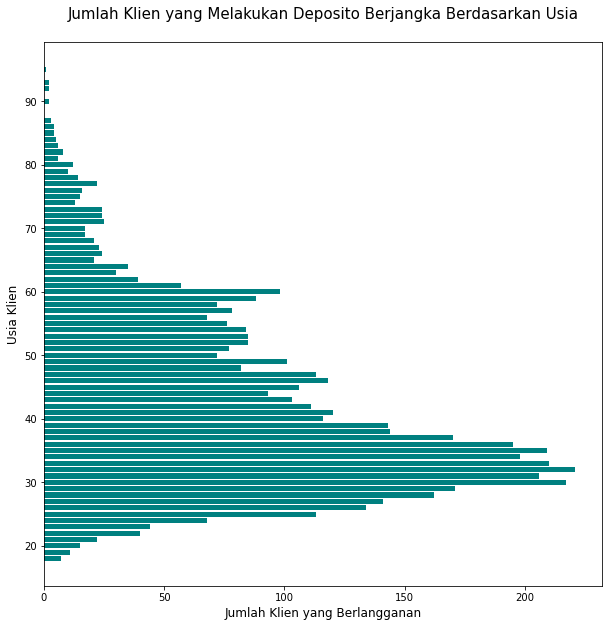

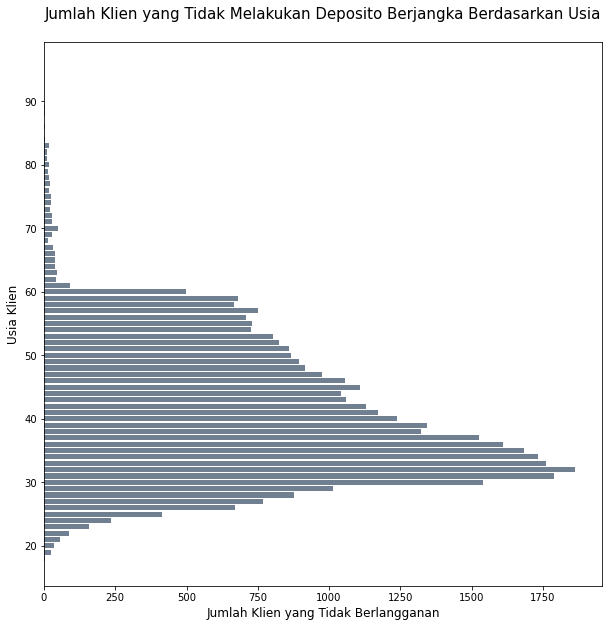

In [17]:
# membuat visualisasi data hubungan antara usia dengan ketertarikan klien
# variabel yang akan digunakan pada plot
x = age_and_y['age']
y1 = age_and_y['yes']
y2 = age_and_y['no']

#####

# inisiasi plot variabel y=yes
plt.figure(figsize = (10,10))
plt.barh(x, y1, color = 'teal')

# judul plot variabel y1=yes
plt.title('Jumlah Klien yang Melakukan Deposito Berjangka Berdasarkan Usia\n', fontsize = 15)
plt.ylabel('Usia Klien', fontsize = 12)
plt.xlabel('Jumlah Klien yang Berlangganan', fontsize = 12)
plt.show()

#####

# inisiasi plot variabel y2=no
plt.figure(figsize = (10,10))
plt.barh(x, y2, color = 'slategrey')

# judul plot variabel y2=no
plt.title('Jumlah Klien yang Tidak Melakukan Deposito Berjangka Berdasarkan Usia\n', fontsize = 15)
plt.ylabel('Usia Klien', fontsize = 12)
plt.xlabel('Jumlah Klien yang Tidak Berlangganan', fontsize = 12)
plt.show()

Kesimpulan: 

    Dari visualisasi di atas, dapat diperoleh bahwa klien yang melakukan desposito berjangka paling banyak terjadi pada usia 32 tahun sebanyak 221 orang. Sedangkan, klien yang tidak melakukan desposito berjangka paling banyak terjadi pada usia 32 tahun sebanyak 1864 orang. Sebaran kedua data tersebut cenderung sama-sama berdistribusi normal melenceng ke kiri atau negatively skewed distribution.

### Variabel `marital` terhadap `y`

Diasumsikan terdapat korelasi yang saling memengaruhi antar kedua variabel tersebut, maka akan dilihat visualisasinya sebagai berikut:

In [18]:
# membuat dataframe yang berisi ketertarikan klien berdasarkan status perkawinan

marital_yes = pd.DataFrame(df[df['y'] == 'yes'].groupby(['marital'])['marital'].count())
marital_yes.rename(columns = {'marital':'yes'}, inplace = True)

marital_no = pd.DataFrame(df[df['y']=='no'].groupby(['marital'])['marital'].count())
marital_no.rename(columns = {'marital':'no'}, inplace = True)

marital_and_y = pd.concat([marital_yes, marital_no], axis = 1).reset_index()
marital_and_y = marital_and_y.sort_values(by = ['marital']).reset_index(drop = True)

marital_and_y

,marital,yes,no
0,divorced,622,4585
1,married,2755,24456
2,single,1912,10878


setelah ditampilkan hubungan antara status perkawinan dan ketertarikan klien, maka akan dilihat visualisasi untuk dapat mengambil kesimpulan.

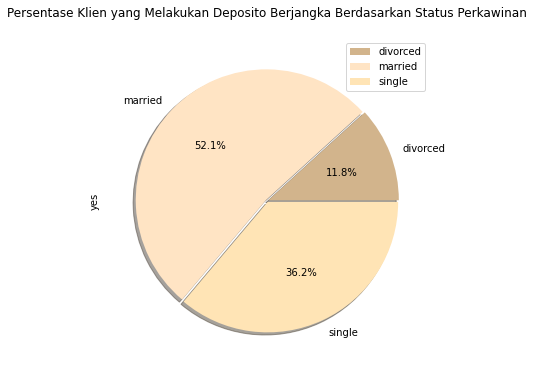

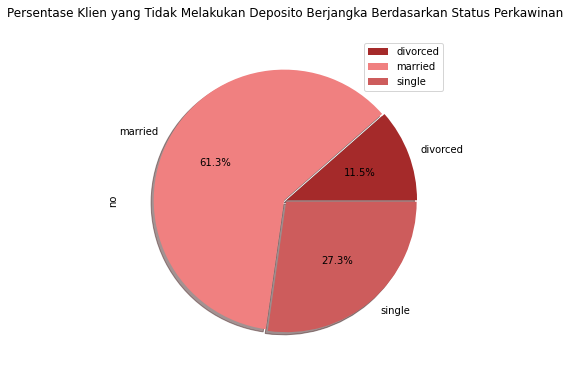

In [19]:
# membuat visualisasi data hubungan antara status perkawinan dengan ketertarikan klien
# inisiasi pie chart marital-yes
marital_yes.plot(kind = 'pie',
                 figsize = (15, 6),
                 autopct = '%1.1f%%',
                 subplots = True,
                 shadow = True,
                 colors = ['tan','bisque', 'moccasin'],
                 explode = [0.01, 0.01, 0.01]
                )

plt.title('Persentase Klien yang Melakukan Deposito Berjangka Berdasarkan Status Perkawinan\n')
plt.show()

# inisiasi pie chart marital-no
marital_no.plot(kind = 'pie',
                figsize = (15, 6),
                autopct = '%1.1f%%',
                subplots = True,
                shadow = True,
                colors = ['brown', 'lightcoral', 'indianred'],
                explode = [0.01, 0.01, 0.01]
                )

plt.title('Persentase Klien yang Tidak Melakukan Deposito Berjangka Berdasarkan Status Perkawinan\n')
plt.show()

Kesimpulan: 

    Dari visualisasi di atas, dapat diperoleh bahwa kemungkinan klien yang melakukan deposito berjangka paling banyak terjadi pada klien yang telah menikah dengan persentase 52.1% atau sebanyak 2755 klien. Sedangkan, kemungkinan klien yang tidak melakukan deposito berjangka paling banyak terjadi juga pada klien yang telah menikah sebanyak 24456 klien atau dengan persentase 61.3%. 

### Variabel `default`, `housing`, dan `loan` terhadap `y`

Diasumsikan terdapat korelasi yang saling memengaruhi antar kedua masing-masing variabel tersebut, maka akan dilihat visualisasinya sebagai berikut:

#### Default

In [20]:
# membuat dataframe yang berisi ketertarikan klien berdasarkan kepemilikan kredit tertunggak/tidak tuntas

default_yes = pd.DataFrame(df[df['y'] == 'yes'].groupby(['default'])['default'].count())
default_yes.rename(columns = {'default':'yes'}, inplace = True)

default_no = pd.DataFrame(df[df['y']=='no'].groupby(['default'])['default'].count())
default_no.rename(columns = {'default':'no'}, inplace = True)

default_and_y = pd.concat([default_yes, default_no], axis = 1)
default_and_y = default_and_y.sort_values(by = ['default']).reset_index('default')

default_and_y

,default,yes,no
0,no,5237,39156
1,yes,52,763


setelah ditampilkan hubungan antara default dengan ketertarikan klien. Maka, akan dilihat visualisasi untuk dapat mengambil kesimpulan.

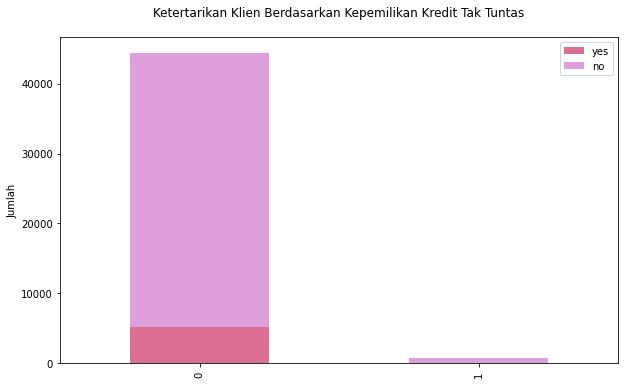

In [21]:
# membuat visualisasi data hubungan antara default dengan ketertarikan klien
# inisiasi bar chart
default_and_y.plot(kind = 'bar', 
                   figsize = (10,6),
                   color = ['palevioletred','plum'],
                   stacked = True)
plt.title('Ketertarikan Klien Berdasarkan Kepemilikan Kredit Tak Tuntas\n', fontsize = 12)
plt.ylabel('Jumlah', fontsize = 10)

plt.show()

Kesimpulan:
    
    Berdasarkan hasil diatas diperoleh hubungan kepemilikan credit default/kredit tak tuntas dengan klien yang berlangganan deposito berjangka. Kelompok klien tanpa kredit tunggakan (0) maupun kelompok klien dengan kredit tunggakan (1) memiliki kecenderungan untuk tidak melakukan berlangganan deposito berjangka. Dapat dilihat bahwa sebagian besar klien bank pada dataset tidak memiliki kredit tanggungan dan tidak memiliki ketertarikan berlangganan deposito berjangka, maka ada baiknya jika bank dapat menarik perhatian klien dengan tipe tersebut agar data dari observasi ini tidak bersifat bias.

#### Housing

In [22]:
# membuat dataframe yang berisi ketertarikan klien berdasarkan kepemilikan kredit rumah

housing_yes = pd.DataFrame(df[df['y'] == 'yes'].groupby(['housing'])['housing'].count())
housing_yes.rename(columns = {'housing':'yes'}, inplace = True)

housing_no = pd.DataFrame(df[df['y']=='no'].groupby(['housing'])['housing'].count())
housing_no.rename(columns = {'housing':'no'}, inplace = True)

housing_and_y = pd.concat([housing_yes, housing_no], axis = 1)
housing_and_y = housing_and_y.sort_values(by = ['housing']).reset_index('housing')

housing_and_y

,housing,yes,no
0,no,3354,16726
1,yes,1935,23193


setelah ditampilkan hubungan antara housing dengan ketertarikan klien. Maka, akan dilihat visualisasi untuk dapat mengambil kesimpulan.

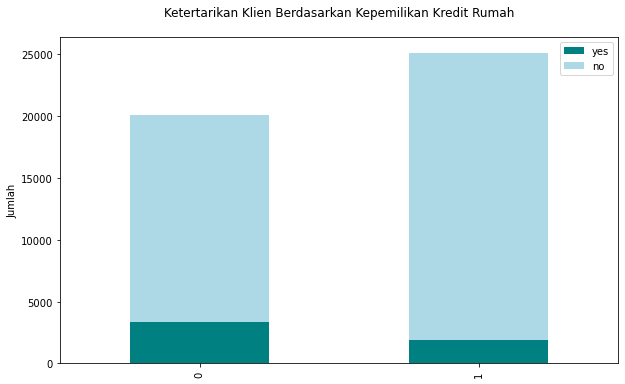

In [23]:
# membuat visualisasi data hubungan antara housing dengan ketertarikan klien
# inisiasi bar chart
housing_and_y.plot(kind = 'bar', 
                   figsize = (10,6),
                   color = ['teal','lightblue'],
                   stacked = True)
plt.title('Ketertarikan Klien Berdasarkan Kepemilikan Kredit Rumah\n', fontsize = 12)
plt.ylabel('Jumlah', fontsize = 10)

plt.show()

Kesimpulan:
    
    Berdasarkan hasil diatas diperoleh hubungan kepemilikan housing loan/kredit rumah dengan klien yang berlangganan deposito berjangka. Kelompok klien tanpa kredit rumah (0) maupun kelompok klien dengan kredit rumah (1) memiliki kecenderungan untuk tidak melakukan berlangganan deposito berjangka.

#### Loan

In [24]:
# membuat dataframe yang berisi ketertarikan klien berdasarkan kepemilikan kredit atas nama pribadi

loan_yes = pd.DataFrame(df[df['y'] == 'yes'].groupby(['loan'])['loan'].count())
loan_yes.rename(columns = {'loan':'yes'}, inplace = True)

loan_no = pd.DataFrame(df[df['y']=='no'].groupby(['loan'])['loan'].count())
loan_no.rename(columns = {'loan':'no'}, inplace = True)

loan_and_y = pd.concat([loan_yes, loan_no], axis = 1)
loan_and_y = loan_and_y.sort_values(by = ['loan']).reset_index('loan')

loan_and_y

,loan,yes,no
0,no,4805,33160
1,yes,484,6759


setelah ditampilkan hubungan antara loan dengan ketertarikan klien. Maka, akan dilihat visualisasi untuk dapat mengambil kesimpulan.

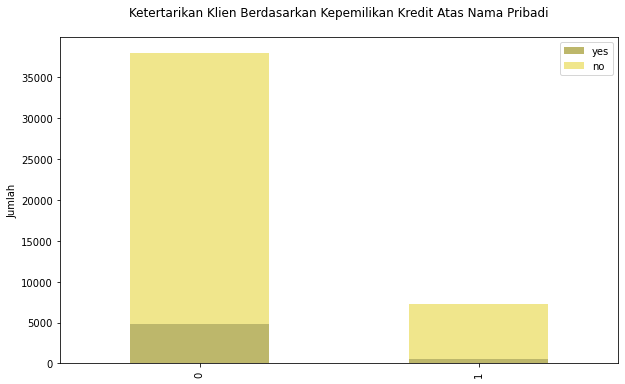

In [25]:
# membuat visualisasi data hubungan antara housing dengan ketertarikan klien
# inisiasi bar chart
loan_and_y.plot(kind = 'bar', 
                figsize = (10,6),
                color = ['darkkhaki','khaki'],
                stacked = True)
plt.title('Ketertarikan Klien Berdasarkan Kepemilikan Kredit Atas Nama Pribadi\n', fontsize = 12)
plt.ylabel('Jumlah', fontsize = 10)

plt.show()

Kesimpulan:
    
    Berdasarkan hasil diatas diperoleh hubungan kepemilikan personal loan/kredit atas nama pribadi dengan klien yang berlangganan deposito berjangka. Kelompok klien tanpa kredit atas nama pribadi (0) maupun kelompok kredit atas nama pribadi (1) memiliki kecenderungan untuk tidak melakukan berlangganan deposito berjangka. Sehingga, klien yang memilih untuk berlangganan deposito berjangka adalah klien yang tidak memiliki kredit atas nama pribadii/klien yang tidak memiliki hutang.

In [26]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,1362.228676,15.806052,258.180211,2.763560,40.200562,0.580362
std,10.618823,3044.794660,8.322417,257.527769,3.097582,100.131506,2.303513
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Classification

### Encoding Data Columns

Beberapa algoritma machine learning memerlukan data input yang berupa numerik, sehingga kita perlu merepresentasikan kolom bertipe kategorik/objek menjadi tipe numerik. Sebelumnya, kita akan melihat kolom apa saja yang bertipe objek

In [27]:
# mengecek tipe data untuk masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45208 non-null  int64 
 1   job        45208 non-null  object
 2   marital    45208 non-null  object
 3   education  45208 non-null  object
 4   default    45208 non-null  object
 5   balance    45208 non-null  int64 
 6   housing    45208 non-null  object
 7   loan       45208 non-null  object
 8   contact    45208 non-null  object
 9   day        45208 non-null  int64 
 10  month      45208 non-null  object
 11  duration   45208 non-null  int64 
 12  campaign   45208 non-null  int64 
 13  pdays      45208 non-null  int64 
 14  previous   45208 non-null  int64 
 15  poutcome   45208 non-null  object
 16  y          45208 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


berdasarkan info di atas, diperoleh 10 kolom bertipe data objek, kemudian akan diubah kedalam bentuk numerik.

In [28]:
# membuat label encoder
le = preprocessing.LabelEncoder()

# mengubah masing-masing kolom yang bertipe kategorik menjadi numerik
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

setelah mengubah masing-masing kolom menjadi numerik, maka kita mengecek kembali tipe data dari dataset ini.

In [29]:
# mengecek kembali tipe data setiap kolom dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45208 non-null  int64
 1   job        45208 non-null  int32
 2   marital    45208 non-null  int32
 3   education  45208 non-null  int32
 4   default    45208 non-null  int32
 5   balance    45208 non-null  int64
 6   housing    45208 non-null  int32
 7   loan       45208 non-null  int32
 8   contact    45208 non-null  int32
 9   day        45208 non-null  int64
 10  month      45208 non-null  int32
 11  duration   45208 non-null  int64
 12  campaign   45208 non-null  int64
 13  pdays      45208 non-null  int64
 14  previous   45208 non-null  int64
 15  poutcome   45208 non-null  int32
 16  y          45208 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.5 MB


In [30]:
# menampilkan data yang telah dilakukan label encoder
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


### Standardization

Kita perlu melakukan standardization atau standarisasi pada data tersebut. 
Standarisasi data adalah adalah proses mengubah data sedemikian rupa sehingga mean tiap kolom menjadi sama dengan nol, dan standard deviation tiap kolom adalah satu. Dengan cara ini, kita mendapatkan skala yang sama untuk semua kolom. Tujuannya adalah untuk menghasilkan distribusi nilai yang lebih normal, dengan nilai-nilai yang tidak terlalu jauh dari rata-rata sehingga mempermudah analisis data lebih lanjut.

In [31]:
# membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()
scale_df = df.copy()

# setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada scale_df.
numeric_df = df.select_dtypes(include = ['int64','float64'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

# menampilkan hasil standarisasi
scale_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606948,4,1,2,0,0.256431,1,0,2,-1.298441,8,0.010950,-0.569341,-0.411469,-0.251949,3,0
1,0.288520,9,2,1,0,-0.437876,1,0,2,-1.298441,8,-0.416194,-0.569341,-0.411469,-0.251949,3,0
2,-0.747388,2,1,1,0,-0.446744,1,1,2,-1.298441,8,-0.707428,-0.569341,-0.411469,-0.251949,3,0
3,0.571040,1,1,3,0,0.047219,1,0,2,-1.298441,8,-0.645298,-0.569341,-0.411469,-0.251949,3,0
4,-0.747388,11,2,3,0,-0.447072,0,0,2,-1.298441,8,-0.233687,-0.569341,-0.411469,-0.251949,3,0


### Heatmap Plot
Heatmap plot digunakan untuk melihat korelasi antar masing-masing dua variabel dari dataset dengan menampilkan warna yang berbeda. Pada heatmap plot, warna gelap menunjukkan korelasi yang kuat dan warna terang menunjukkan korelasi yang lebih lemah.

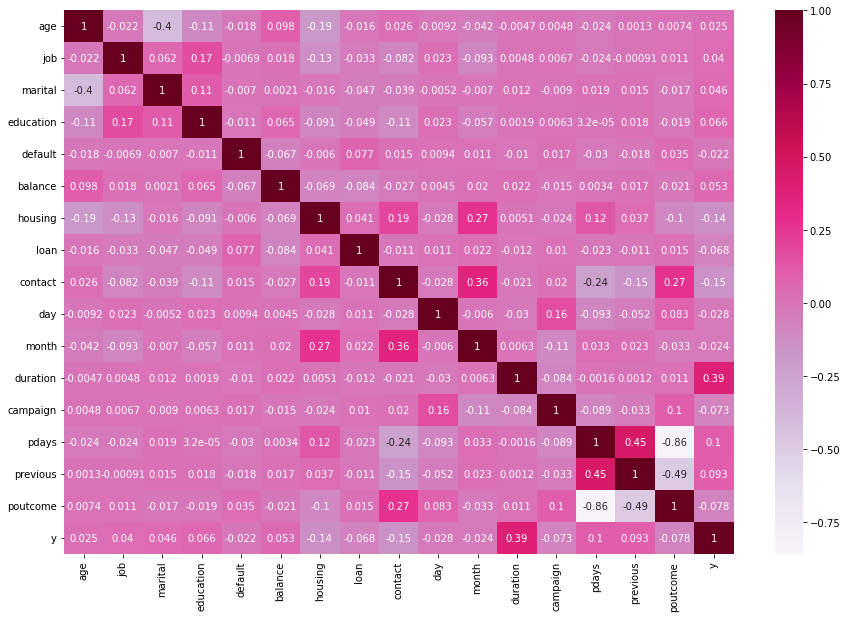

In [32]:
# visualisasi korelasi menggunakan heatmap plot
plt.figure(figsize = (15, 10))
ax = sns.heatmap(scale_df.corr(), annot=True, cmap="PuRd")

In [33]:
# menampilkan nilai korelasi antar kolom pada dataframe dalam bentuk matriks
scale_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021864,-0.403254,-0.106782,-0.017881,0.097805,-0.185542,-0.015604,0.026161,-0.009151,-0.042383,-0.004657,0.004795,-0.023762,0.001286,0.007371,0.025153
job,-0.021864,1.000000,0.062051,0.166718,-0.006851,0.018182,-0.125319,-0.032958,-0.082054,0.022813,-0.092814,0.004757,0.006713,-0.024450,-0.000907,0.011005,0.040444
marital,-0.403254,0.062051,1.000000,0.108566,-0.007026,0.002126,-0.016092,-0.046887,-0.039202,-0.005249,-0.006990,0.011834,-0.008971,0.019165,0.014969,-0.016842,0.045581
education,-0.106782,0.166718,0.108566,1.000000,-0.010725,0.064512,-0.090765,-0.048582,-0.110890,0.022726,-0.057283,0.001886,0.006296,0.000032,0.017558,-0.019340,0.066225
default,-0.017881,-0.006851,-0.007026,-0.010725,1.000000,-0.066745,-0.006023,0.077243,0.015405,0.009430,0.011487,-0.010031,0.016837,-0.029983,-0.018332,0.034902,-0.022422
balance,0.097805,0.018182,0.002126,0.064512,-0.066745,1.000000,-0.068724,-0.084327,-0.027248,0.004471,0.019837,0.021576,-0.014700,0.003441,0.016678,-0.020974,0.052845
housing,-0.185542,-0.125319,-0.016092,-0.090765,-0.006023,-0.068724,1.000000,0.041279,0.188102,-0.027969,0.271430,0.005091,-0.023509,0.124189,0.037081,-0.099981,-0.139172
loan,-0.015604,-0.032958,-0.046887,-0.048582,0.077243,-0.084327,0.041279,1.000000,-0.010830,0.011425,0.022099,-0.012382,0.010037,-0.022742,-0.011036,0.015445,-0.068178
contact,0.026161,-0.082054,-0.039202,-0.110890,0.015405,-0.027248,0.188102,-0.010830,1.000000,-0.027973,0.361134,-0.020839,0.019664,-0.244826,-0.147817,0.272225,-0.148400
day,-0.009151,0.022813,-0.005249,0.022726,0.009430,0.004471,-0.027969,0.011425,-0.027973,1.000000,-0.006001,-0.030164,0.162403,-0.093030,-0.051702,0.083444,-0.028333


berdasarkan plot di atas, `housing`, `loan`, `contact`, `campaign`, dan `poutcome` memiliki korelasi yang sangat rendah terhadap variabel `y`. Artinya, kepemilikan kredit rumah, kepemilikan kredit personal, bentuk komunikasi terhadap klien, jumlah kontak yang dilakukan selama campaign berlangsung, dan hasil dari campaign pemasaran sebelumnya cenderung tidak memengaruhi keputusan klien dalam memulih akan belangganan deposito berjangka atau tidak. Selain itu, `duration` memiliki korelasi paling tinggi terhadap `y` yaitu sebesar 0.394512. Artinya, durasi kontak terakhir yang dilakukan semakin panjang maka kemungkinan klien untuk memilih berlangganan deposito berjangka akan semakin besar.

### Splitting Data

In [34]:
# membuat variabel X dan y
X = scale_df.drop('y', axis = 1) # variabel fitur
y = scale_df['y'] # variabel target

# membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

pembagian data testing sebesar 30% dan data training sebesar 70%, dengan random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing.

In [35]:
# melihat jumlah data training dan data testing
print(X_train.shape)
print(X_test.shape)

(31645, 16)
(13563, 16)


dari hasil di atas, diperoleh data training memiliki 31645 baris dan 16 kolom sedangkan data testing memiliki 13563 baris dan 16 kolom.

# Classification

#### Model Machine Learning yang akan di buat yaitu :
1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. Confusion Matrix

#### Confusion Matrix
Matriks yang digunakan untuk mengevaluasi performa suatu model klasifikasi pada data testing. Confusion matrix digunakan untuk menghitung berapa banyak data yang benar atau salah diprediksi oleh model sebagai kelas positif atau negatif. Confusion matrix memiliki 4 jenis metrik evaluasi, yaitu:

* True Positive (TP): Jumlah data yang benar diprediksi sebagai kelas positif.
TP merupakan client yang diprediksi bergabung dengan program berlangganan deposito berjangka dan benar benar bergabung.
* True Negative (TN): Jumlah data yang benar diprediksi sebagai kelas negatif.
TN merupakan client yang diprediksi tidak bergabung dengan program berlangganan deposito berjangka namun kenyataannya bergabung.
* False Positive (FP): Jumlah data yang salah diprediksi sebagai kelas positif.
FP merupakn client yang diprediksi bergabung dengan program berlangganan deposito berjangka tetapi kenyataannya tidak bergabung.
* False Negative (FN): Jumlah data yang salah diprediksi sebagai kelas negatif.
FN merupakan client yang di prediksi tidak bergabung dengan program berlangganan deposito berjangka tetapi kenyataannya bergabung.

#### Classification Report
    * Precision: fraksi dari prediksi client yang bergabung yang benar-benar bergabung.
    precision = true positives / (true positives + false positives)

    * Recall: fraksi dari client yang benar-benar diprediksi bergabung.
    recall = true positives / (true positives + false negatives)

    * F1-score: harmonic mean dari precision dan recall.
    f1-score = 2 * precision * recall / (precision + recall)

    * Support: jumlah sampel yang termasuk dalam setiap kelas.

    * Accuracy: fraksi dari prediksi yang benar secara keseluruhan.
    accuracy = (true positives + true negatives) / total

    * Macro average: rata-rata precision, recall, dan F1-score dari semua kelas secara independen.

    * Weighted average: rata-rata precision, recall, dan F1-score yang diponderasikan berdasarkan support masing-masing kelas.

### Logistic Regression
Digunakan untuk menganalisis hubungan antara variabel dependen dan variabel independen, dan digunakan untuk memprediksi nilai probabilitas dari sebuah kejadian yang bersifat biner (ya atau tidak, benar atau salah, sukses atau gagal).

In [36]:
# mendefinisikan model machine learning
lr = LogisticRegression()

# melatih model pada data training
lr.fit(X_train, y_train)

# memprediksi kelas target pada data testing
y_lr_pred = lr.predict(X_test)

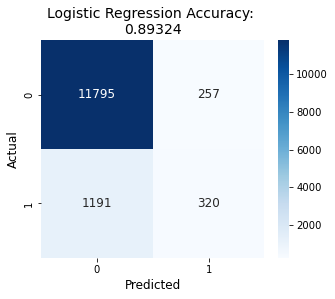

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12052
           1       0.55      0.21      0.31      1511

    accuracy                           0.89     13563
   macro avg       0.73      0.60      0.62     13563
weighted avg       0.87      0.89      0.87     13563

Accuracy Score: 0.8932389589323896
Precision Score: 0.5545927209705372
Recall Score: 0.21178027796161483
F-1 Score: 0.30651340996168586


In [37]:
# confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_lr_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues', annot_kws = {'fontsize' : 12})
plt.title('Logistic Regression Accuracy: \n{:.5f}'.format(accuracy_score(y_test, y_lr_pred)), fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.show()

# classification report for logistic regression
print('Classification Report:\n', classification_report(y_test, y_lr_pred))

print(f'Accuracy Score: {accuracy_score(y_test, y_lr_pred)}')
print(f'Precision Score: {precision_score(y_test, y_lr_pred)}')
print(f'Recall Score: {recall_score(y_test, y_lr_pred)}')
print(f'F-1 Score: {f1_score(y_test, y_lr_pred)}')

### K-Nearest Neighbour
K-Nearest Neighbors (KNN) adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. KNN mencari K tetangga terdekat dari titik data yang baru dan menentukan kelas atau nilai regresi untuk titik data baru berdasarkan mayoritas dari K tetangga terdekat tersebut.

Menghitung error rate atau tingkat kesalahan dalam model KNN yang dihasilkan, dengan menghitung rata-rata prediksi yang salah pada setiap nilai n_neighbors dari 1 hingga 40. Kemudian, nilai error rate ini dapat digunakan untuk memilih nilai optimal n_neighbors yang memberikan tingkat kesalahan terendah pada model KNN, sehingga memungkinkan model untuk memberikan prediksi yang lebih akurat

In [38]:
error = []

# kalkulasi eror untuk k_values antara 1 dan 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

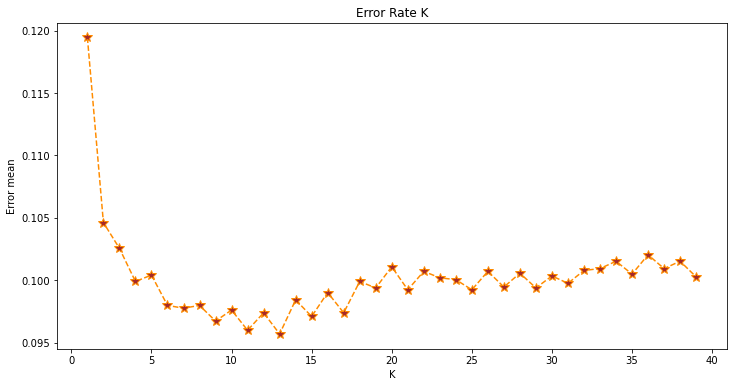

In [39]:
plt.figure(figsize = (12, 6))  
plt.plot(range(1, 40), error, color = 'darkorange', linestyle = 'dashed', marker = '*',  
         markerfacecolor = 'brown', markersize = 10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

dari plot di atas, diperoleh nilai k = 13 karena memiliki error mean terendah diantara nilai k 1 hingga 40.

In [40]:
# mendefinisikan model machine learning
knn = KNeighborsClassifier(n_neighbors = 13)

# melatih model pada data training
knn.fit(X_train, y_train)

# memprediksi kelas target pada data testing
y_knn_pred = knn.predict(X_test)

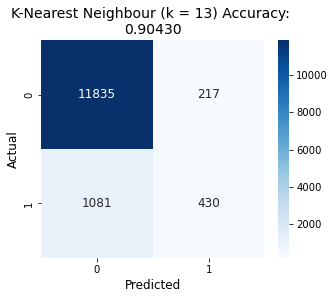

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12052
           1       0.66      0.28      0.40      1511

    accuracy                           0.90     13563
   macro avg       0.79      0.63      0.67     13563
weighted avg       0.89      0.90      0.89     13563

Accuracy Score: 0.9042984590429846
Precision Score: 0.6646058732612056
Recall Score: 0.28457974851091994
F-1 Score: 0.39851714550509737


In [41]:
# confusion matrix for k-nearest neighbors
cm = confusion_matrix(y_test, y_knn_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues', annot_kws = {'fontsize' : 12})
plt.title('K-Nearest Neighbour (k = 13) Accuracy: \n{:.5f}'.format(accuracy_score(y_test, y_knn_pred)), fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.show()

# classification report for k-nearest neighbors
print('Classification Report:\n', classification_report(y_test, y_knn_pred))

print(f'Accuracy Score: {accuracy_score(y_test, y_knn_pred)}')
print(f'Precision Score: {precision_score(y_test, y_knn_pred)}')
print(f'Recall Score: {recall_score(y_test, y_knn_pred)}')
print(f'F-1 Score: {f1_score(y_test, y_knn_pred)}')

### SVM (Support Vector Machine)
Mencari sebuah hyperplane (bidang) yang terbaik memisahkan dua kelas pada data training dengan margin terbesar yang mungkin. Margin adalah jarak antara hyperplane dengan titik-titik terdekat dari kedua kelas.

In [42]:
# mendefinisikan model machine learning
svm = SVC(kernel = 'linear')

# melatih model pada data training
svm.fit(X_train, y_train)

# memprediksi kelas target pada data testing
y_svm_pred = svm.predict(X_test)

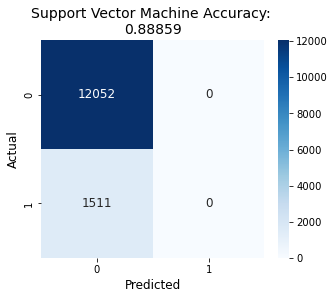

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12052
           1       0.00      0.00      0.00      1511

    accuracy                           0.89     13563
   macro avg       0.44      0.50      0.47     13563
weighted avg       0.79      0.89      0.84     13563

Accuracy Score: 0.8885939688859397
Precision Score: 0.0
Recall Score: 0.0
F-1 Score: 0.0


In [43]:
# confusion matrix for k-nearest neighbors
cm = confusion_matrix(y_test, y_svm_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues', annot_kws = {'fontsize' : 12})
plt.title('Support Vector Machine Accuracy: \n{:.5f}'.format(accuracy_score(y_test, y_svm_pred)), fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.show()

# classification report for k-nearest neighbors
print('Classification Report:\n', classification_report(y_test, y_svm_pred))

print(f'Accuracy Score: {accuracy_score(y_test, y_svm_pred)}')
print(f'Precision Score: {precision_score(y_test, y_svm_pred)}')
print(f'Recall Score: {recall_score(y_test, y_svm_pred)}')
print(f'F-1 Score: {f1_score(y_test, y_svm_pred)}')

### Decision Tree
Algoritma ini menghasilkan sebuah struktur pohon yang dapat digunakan untuk mengambil keputusan dengan menganalisis fitur-fitur pada data. Pada decision tree, setiap node pada pohon merepresentasikan sebuah fitur, sedangkan cabang-cabang pada node merepresentasikan kemungkinan nilai dari fitur tersebut. Node daun pada pohon merepresentasikan kelas atau nilai target.

In [44]:
# mendefinisikan model machine learning
tree = DecisionTreeClassifier()

# melatih model pada data training
tree.fit(X_train, y_train)

# memprediksi kelas target pada data testing
y_tree_pred = tree.predict(X_test)

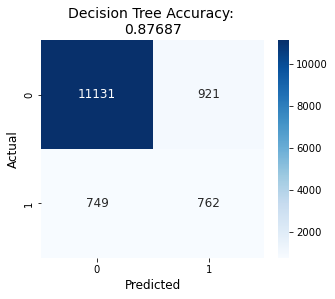

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     12052
           1       0.45      0.50      0.48      1511

    accuracy                           0.88     13563
   macro avg       0.69      0.71      0.70     13563
weighted avg       0.88      0.88      0.88     13563

Accuracy Score: 0.8768708987687089
Precision Score: 0.45276292335115864
Recall Score: 0.5043017868960953


In [45]:
# confusion matrix for decision tree
cm = confusion_matrix(y_test, y_tree_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues', annot_kws = {'fontsize' : 12})
plt.title('Decision Tree Accuracy: \n{:.5f}'.format(accuracy_score(y_test, y_tree_pred)), fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.show()

# classification report for k-nearest neighbors
print('Classification Report:\n', classification_report(y_test, y_tree_pred))

print(f'Accuracy Score: {accuracy_score(y_test, y_tree_pred)}')
print(f'Precision Score: {precision_score(y_test, y_tree_pred)}')
print(f'Recall Score: {recall_score(y_test, y_tree_pred)}')

### Random Forest
Algoritma ini membangun beberapa pohon keputusan (decision tree) secara acak pada dataset dan kemudian menggabungkan hasil prediksi dari masing-masing pohon untuk menghasilkan prediksi akhir.

In [46]:
# mendefinisikan model machine learning
rf = RandomForestClassifier(n_estimators=200)

# melatih model pada data training
rf.fit(X_train, y_train)

# memprediksi kelas target pada data testing
y_rf_pred = rf.predict(X_test)

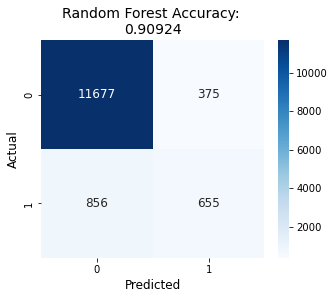

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12052
           1       0.64      0.43      0.52      1511

    accuracy                           0.91     13563
   macro avg       0.78      0.70      0.73     13563
weighted avg       0.90      0.91      0.90     13563

Accuracy Score: 0.9092383690923836
Precision Score: 0.6359223300970874
Recall Score: 0.43348775645268034
F-1 Score: 0.5155450609996065


In [47]:
# confusion matrix for random forest
cm = confusion_matrix(y_test, y_rf_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues', annot_kws = {'fontsize' : 12})
plt.title('Random Forest Accuracy: \n{:.5f}'.format(accuracy_score(y_test, y_rf_pred)), fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.show()

# classification report for k-nearest neighbors
print('Classification Report:\n', classification_report(y_test, y_rf_pred))

print(f'Accuracy Score: {accuracy_score(y_test, y_rf_pred)}')
print(f'Precision Score: {precision_score(y_test, y_rf_pred)}')
print(f'Recall Score: {recall_score(y_test, y_rf_pred)}')
print(f'F-1 Score: {f1_score(y_test, y_rf_pred)}')

### Naive Bayes
Memanfaatkan teorema Bayes untuk menghitung probabilitas dari setiap kelas berdasarkan atribut yang ada pada data.

In [48]:
# mendefinisikan model machine learning
nb = GaussianNB()

# melatih model pada data training
nb.fit(X_train, y_train)

# memprediksi kelas target pada data testing
y_nb_pred = nb.predict(X_test)

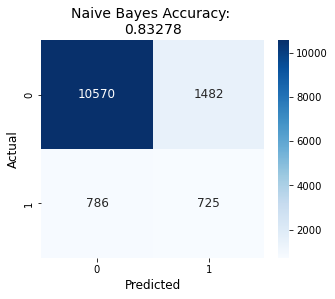

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     12052
           1       0.33      0.48      0.39      1511

    accuracy                           0.83     13563
   macro avg       0.63      0.68      0.65     13563
weighted avg       0.86      0.83      0.85     13563

Accuracy Score: 0.8327803583278036
Precision Score: 0.3285002265518804
Recall Score: 0.4798146922567836
F-1 Score: 0.3899946207638515


In [49]:
# confusion matrix for naive bayes
cm = confusion_matrix(y_test, y_nb_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues', annot_kws = {'fontsize' : 12})
plt.title('Naive Bayes Accuracy: \n{:.5f}'.format(accuracy_score(y_test, y_nb_pred)), fontsize = 14)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.show()

# classification report for k-nearest neighbors
print('Classification Report:\n', classification_report(y_test, y_nb_pred))

print(f'Accuracy Score: {accuracy_score(y_test, y_nb_pred)}')
print(f'Precision Score: {precision_score(y_test, y_nb_pred)}')
print(f'Recall Score: {recall_score(y_test, y_nb_pred)}')
print(f'F-1 Score: {f1_score(y_test, y_nb_pred)}')

In [50]:
print('Hasil beberapa akurasi dari model machine learning:')
print('Akurasi Logistic Regression:', accuracy_score(y_test, y_lr_pred))
print('Akurasi K-Nearest Neighbors:', accuracy_score(y_test, y_knn_pred))
print('Akurasi Support Vector Machine:', accuracy_score(y_test, y_svm_pred))
print('Akurasi Decision Tree:', accuracy_score(y_test, y_tree_pred))
print('Akurasi Random Forest:', accuracy_score(y_test, y_rf_pred))
print('Akurasi Naive Bayes:', accuracy_score(y_test, y_nb_pred))

Hasil beberapa akurasi dari model machine learning:
Akurasi Logistic Regression: 0.8932389589323896
Akurasi K-Nearest Neighbors: 0.9042984590429846
Akurasi Support Vector Machine: 0.8885939688859397
Akurasi Decision Tree: 0.8768708987687089
Akurasi Random Forest: 0.9092383690923836
Akurasi Naive Bayes: 0.8327803583278036


Kesimpulan:
    
    Berdasarkan hasil klasifikasi dari model meachine learning di atas, dilihat dari performa masing-masing model, algoritma Random Forest dan K-Nearest Neighbors memiliki performa klasifikasi yang cenderung lebih baik dari yang lain, dengan nilai akurasi yang tinggi 0.908 dan 0.904. Walaupun, semua algoritma belum memberikan performa yang baik karena menggunakan imbalaced data. Terlihat dari nilai akurasi dari semua model memiki nilai yang cukup baik, sedangkan nilai dari precision, recall, dan f-1 masih cukup rendah. Sehingga memerlukan penanganan lebih lanjut untuk mengatasi hal tersebut. 
    Jadi, model machine learning yang akan digunakan dalam Bank Marketing Dataset adalah Random Forest karena memiliki nilai akurasi yang paling tinggi daripada model yang lainnya. Random forest memilih sample data secara acak kemudian membangun decision tree menggunakan subset acak dari data training  tersebut kemudian dievaluasi menggunakan metrik evaluasi. Kelebihan dari random forest adalah kemampuannya dalam mengatasi overfitting, menghasilkan prediksi yang lebih stabil, dan memberikan informasi tentang pentingnya setiap fitur dalam data.